In [26]:
import pandas as pd
import seaborn as sns

def print_sort_chart(data, title, max_elements=100000):
    unique_num_elements = data_raw['NumElements'].unique()
    avg_data_rows = []
    for u_elem in unique_num_elements:
        data = [u_elem]
        filtered_rows = data_raw[data_raw['NumElements'] == u_elem]
        data.append(filtered_rows['InsertionSortTime'].mean())
        data.append(filtered_rows['MergeSortTime'].mean())
        data.append(filtered_rows['HeapSortTime'].mean())
        data.append(filtered_rows['QuickSortInPlaceTime'].mean())
        data.append(filtered_rows['QuickSortModifiedTime'].mean())
        avg_data_rows.append(data)
    data_avg = pd.DataFrame(avg_data_rows, columns=['NumElements', 'Insertion Sort', 'Merge Sort', 'Heap Sort', 'Quick Sort In Place', 'Quick Sort Modified'])
    data_for_vis = []
    for col in data_avg:
        if col is not 'NumElements':
            for index, val in enumerate(data_avg[col]):
                data_for_vis.append([unique_num_elements[index], val, col])
    data_finalized = pd.DataFrame(data_for_vis, columns=['Number of Elements', 'Average Time (ms)', 'Sort'])
    data_finalized = pd.DataFrame(data_for_vis, columns=['Number of Elements', 'Average Time (ms)', 'Sort'])
    data_filtered = data_finalized[data_finalized['Number of Elements'] <= max_elements]
    sns.lineplot(data=data_filtered, x='Number of Elements', y='Average Time (ms)', hue='Sort').set_title(title)

In [27]:
data_raw = pd.read_csv('jacob_sorting_results.csv')
data_raw

,Iteration,NumElements,InsertionSortTime,MergeSortTime,HeapSortTime,QuickSortInPlaceTime,QuickSortModifiedTime
0,1,10,1,0,2,0,0
1,1,100,0,0,0,0,0
2,1,1000,5,0,0,1,1
3,1,1500,7,0,0,2,2
4,1,2000,13,0,1,3,3
...,...,...,...,...,...,...,...
95,5,35000,3817,8,28,54,54
96,5,40000,5071,10,33,65,62
97,5,45000,6301,11,37,70,69
98,5,50000,8066,12,41,77,77


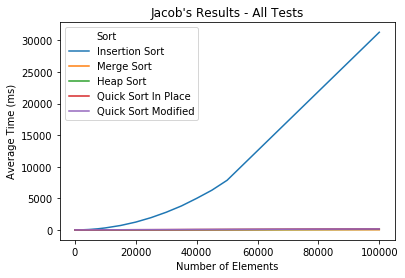

In [28]:
print_sort_chart(data_raw, 'Jacob\'s Results - All Tests')

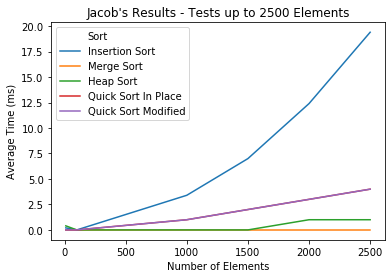

In [29]:
print_sort_chart(data_raw, 'Jacob\'s Results - Tests up to 2500 Elements', 2500)

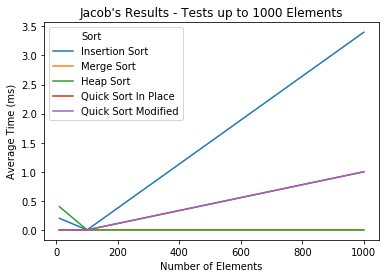

In [30]:
print_sort_chart(data_raw, 'Jacob\'s Results - Tests up to 1000 Elements', 1000)

In [31]:
data_raw = pd.read_csv('mason_sorting_results.csv')
data_raw

,Iteration,NumElements,InsertionSortTime,MergeSortTime,HeapSortTime,QuickSortInPlaceTime,QuickSortModifiedTime
0,1,10,1,0,5,0,0
1,1,100,0,0,0,0,0
2,1,1000,12,0,2,2,2
3,1,1500,23,0,3,3,3
4,1,2000,42,0,2,5,5
...,...,...,...,...,...,...,...
95,5,35000,10367,17,64,77,78
96,5,40000,14960,22,84,96,94
97,5,45000,17546,22,83,98,98
98,5,50000,21344,25,95,107,109


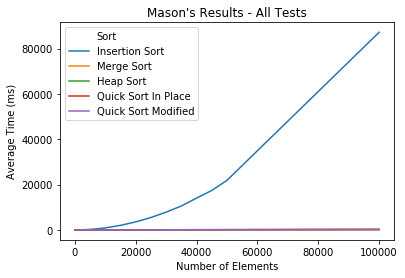

In [32]:
print_sort_chart(data_raw, 'Mason\'s Results - All Tests')

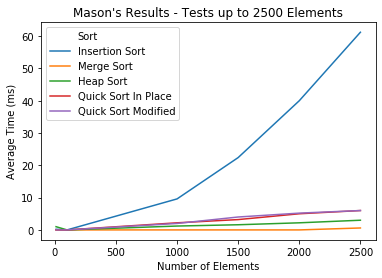

In [33]:
print_sort_chart(data_raw, 'Mason\'s Results - Tests up to 2500 Elements', 2500)

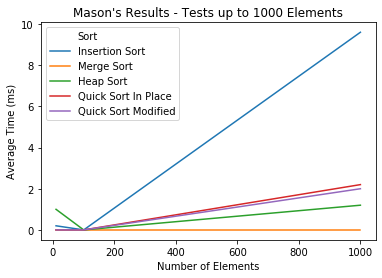

In [34]:
print_sort_chart(data_raw, 'Mason\'s Results - Tests up to 1000 Elements', 1000)